# Libraries for Modelling

In [55]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing  import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection  import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
#from sklearn.linear_model import LogisticRegression

In [56]:
# import the train and test datasets
train = pd.read_csv('CAX_MortgageModeling_Train.csv')
test = pd.read_csv('CAX_MortgageModeling_Test.csv')

In [57]:
# Fill na with zero for the dependent variable that contain NA
test["RESULT"] = test["RESULT"].fillna(0).astype("int")


In [58]:
# The test Na has zero's in integer
Counter(test["RESULT"])

Counter({0: 15214})

In [59]:
# The train dependent variables is inbalance
Counter(train["RESULT"])

Counter({'FUNDED': 36023, 'NOT FUNDED': 9619})

# Data preparation and Cleaning both for Train & Test

In [60]:
# Creating a new variables  and converting them in thousands
train["MORT_AMT in Thousand"] =(train["MORTGAGE AMOUNT"]/ 10000).astype(int)
test["MORT_AMT in Thousand"] =(test["MORTGAGE AMOUNT"]/ 10000).astype(int)

In [61]:
# Delete columns that are not useful or not useful description from the data dictionary in train and test datasets
train.drop(['NAICS CODE','INCOME TYPE', 'MORTGAGE AMOUNT','MORTGAGE NUMBER','FSA'], axis=1, inplace=True)
# Delete columns that are not useful or not useful description from the data dictionary
test.drop(['NAICS CODE','INCOME TYPE', 'MORTGAGE AMOUNT','MORTGAGE NUMBER','FSA'], axis=1, inplace=True)

In [62]:
#The classification of the property type  being used to secure the mortgage fund and Single Detached as the most
# and Fourplex as the least
train["PROPERTY TYPE"].value_counts()
test["PROPERTY TYPE"].value_counts()

#Since  Male is the most common Gender we replace it with the male
train.replace(to_replace ="Unknown",
                 value ="Male",inplace =True)
test.replace(to_replace ="Unknown",
                 value ="Male",inplace =True)

In [63]:
# One of the variable was in string format we have replace under 25 with 21-25
train.replace(to_replace ="Under 25",
                 value ="21-25",inplace =True)
# One of the variable was in string format we have replace under 25 with 21-25
test.replace(to_replace ="Under 25",
                 value ="21-25",inplace =True)

In [64]:

# One of the variable was in string format we have replace 70 and over with 70-74
train.replace(to_replace ="70 and over",
                 value ="70-74",inplace =True)


# One of the variable was in string format we have replace 70 and over with 70-74
test.replace(to_replace ="70 and over",
                 value ="70-74",inplace =True)

In [65]:
# Function to split and calculate the bin values of age_range variables and rename it as age variables
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

In [66]:
# We calculate and apply the mean values to the  dataframe
train['AGE'] = train['AGE RANGE'].apply(lambda x: split_mean(x))

# We calculate and apply the mean values to the  dataframe
test['AGE'] = test['AGE RANGE'].apply(lambda x: split_mean(x))

In [67]:
# we divide the variables by 30 to get the number of months on each of variables
def calculate_months(day):
    months = day/30
    return int(months)
## for train
columns = ["AMORTIZATION"]
for col in columns:
    train[col]= train[col].apply(calculate_months)
## test    
columns = ["AMORTIZATION"]
for col in columns:    
    test[col]= test[col].apply(calculate_months)

In [68]:
# we replace the variable na with python variables formats
train.replace(to_replace ="NOT FUNDED",
                 value ="NOT_FUNDED",inplace =True)

In [69]:
## categorical variable encoding using replace values with dictionary comprehension to assign values to each of the categorical variables
labels = train['PROPERTY TYPE'].astype('category').cat.categories.tolist()
replace_map_comp = {'PROPERTY TYPE' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
## we append the new encoded values to the dataframe
train.replace(replace_map_comp, inplace=True)


## categorical variable encoding using replace values with dictionary comprehension to assign values to each of the categorical variables
labels = test['PROPERTY TYPE'].astype('category').cat.categories.tolist()
replace_map_comp = {'PROPERTY TYPE' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
## we append the new encoded values to the dataframe
test.replace(replace_map_comp, inplace=True)

In [70]:
# Categorical encoding by assiging values to 1 as Male and 0 as Female
replace_map_g = {'GENDER': {'Male': 1, 'Female': 0}}

## we append the new encoded values to the dataframe on GENDER Variable
train.replace(replace_map_g, inplace=True)


# Categorical encoding by assiging values to 1 as Male and 0 as Female
replace_map_g = {'GENDER': {'Male': 1, 'Female': 0}}

## we append the new encoded values to the dataframe on GENDER Variable
test.replace(replace_map_g, inplace=True)

In [71]:
## categorical variable encoding using replace values with dictionary comprehension to assign values to each of th
labels = train['PAYMENT FREQUENCY'].astype('category').cat.categories.tolist()
replace_map_paymt = {'PAYMENT FREQUENCY' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

## we append the new encoded values to the dataframe on PAYMENT FREQUENCY Variable
train.replace(replace_map_paymt, inplace=True)


## categorical variable encoding using replace values with dictionary comprehension to assign values to each of th
labels = test['PAYMENT FREQUENCY'].astype('category').cat.categories.tolist()
replace_map_paymt = {'PAYMENT FREQUENCY' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

## we append the new encoded values to the dataframe on PAYMENT FREQUENCY Variable
test.replace(replace_map_paymt, inplace=True)

In [72]:
# we convert the mortgage purpose variables to category
train["MORTGAGE PURPOSE"] = train["MORTGAGE PURPOSE"].astype("category")

# Categorical encoding by assiging values to 1 as Purchase  and 0 as Refinance
replace_map_mort = {'MORTGAGE PURPOSE': {'Purchase': 1, 'Refinance': 0}}

## we replace the new encoded values to the dataframe
train.replace(replace_map_mort, inplace=True)


# we convert the mortgage purpose variables to category
test["MORTGAGE PURPOSE"] = test["MORTGAGE PURPOSE"].astype("category")

# Categorical encoding by assiging values to 1 as Purchase  and 0 as Refinance
replace_map_mort = {'MORTGAGE PURPOSE': {'Purchase': 1, 'Refinance': 0}}

## we replace the new encoded values to the dataframe
test.replace(replace_map_mort, inplace=True)

In [73]:
# We dropped the age_range variable after extracting the age
train.drop(["AGE RANGE"], axis = 1, inplace =True)
test.drop(["AGE RANGE"], axis = 1, inplace =True)

In [74]:
 #create feature for test for out_of _sample (X)
feature_cols = ['PROPERTY VALUE', 'MORTGAGE PAYMENT', 'GDS', 'LTV','CREDIT SCORE', 'TDS','AMORTIZATION','RATE','MORTGAGE PURPOSE','PAYMENT FREQUENCY','PROPERTY TYPE','TERM','GENDER','INCOME','MORT_AMT in Thousand','AGE']
X = test[feature_cols]

In [75]:
## We have the train data
#train_df = alldata[alldata.RESULT != 0]

#we have the test datasets
#test_df= alldata[alldata['RESULT']==0]

In [76]:
#We dropped the Unique_id from the train since we not using it in training the model
Counter(train["RESULT"])
train = train.drop('Unique_ID', axis =1)
#test = test.drop('Unique_ID', axis = 1)
#test_df = test_df.drop('Unique_ID', axis =1)

In [77]:
# We split the dependent variables and the explanatory variables and peformed dummy on the variables
# And map the dependent to One and zeros 
pre_y = train['RESULT']
pre_X = train.drop('RESULT', axis =1)
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(FUNDED = 1, NOT_FUNDED = 0))
pre_y.shape

(45642,)

In [78]:
# This is  a resampling technique to balance the dependent variables which was inbalance
#This is done by calculating the distances among samples of the minority class and samples of the training data.
#SMOTE is an oversampling algorithm that relies on the concept of nearest neighbors to create its synthetic data
smote = SMOTE(ratio = 'minority')
X1, y = smote.fit_sample(dm_X, dm_y)
se = MinMaxScaler()
X = se.fit_transform(X1)

In [79]:
# The dependent variables is now balance
Counter(y)

Counter({1: 36023, 0: 36023})

# Evaluation procedure : Train/test split

    1.Split the dataset into two pieces: a training set and a testing set.
    2.Train the model on the training set.
    3.Test the model on the testing set, and evaluate how well we did.



In [80]:
#Evaluating the procedures for Train & testing datasets
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split # Train 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [81]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
# make class predictions for the testing set
#Testing accuracy is a better estimate than training accuracy of out-of-sample performance
y_pred_class = logreg.predict(X_test)

In [83]:
# calculate accuracy # 60% Accuracy for Logistic regression
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6034004163775156


In [84]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_pred_class))

[[4676 2518]
 [3197 4019]]


In [85]:
cm= confusion_matrix(y_test, y_pred_class)
print(cm)

[[4676 2518]
 [3197 4019]]


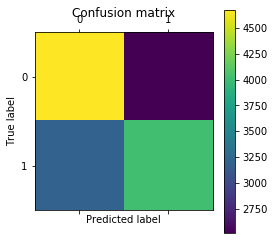

In [86]:
#show plot of confusion matrix 
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [97]:
# We Use KNN model for the train and test split  Accuracy was 76%
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred2))

0.7595419847328244


In [88]:
#print(metrics.accuracy_score(y_test, y_pred2)
print(metrics.confusion_matrix(y_test, y_pred2))

[[5026 2168]
 [1297 5919]]


In [89]:
km= confusion_matrix(y_test, y_pred2)
print(km)

[[5026 2168]
 [1297 5919]]


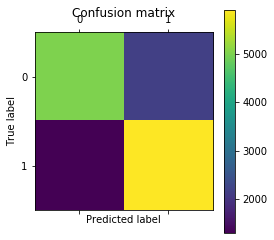

In [90]:
#show plot of confusion matrix 
plt.matshow(km)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Cross-validation example: parameter tuning

In [92]:
#Select the best tuning parameters (aka "hyperparameters") for KNN on
# We Use KNN model using 5 fold CV  Accuracy was 76%
from sklearn.model_selection import cross_val_score

In [93]:
# 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.5870923  0.73907009 0.81387925 0.82162687 0.81544975]


In [44]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.7559092508171688


In [94]:
# 5-fold cross-validation with logistic regression # Accuracy was 60%
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean())

c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kcmbo\pycharmprojects\fundcrowd\venv\lib\site-packages\sklearn\linear_model\logisti

0.6064323390390334


# Cross-validation example: model selection

In [95]:
# When Comparing the model both for  train/test split and 5 K-Fold Cross validation KNN Model was 76% & Logistics was 61%
# So we select KNN which is a better estimator of out-sample and we use it to predict out-sample data

In [98]:
## Out of sample prediction and output
out_pred = knn.predict(test[feature_cols])

holdout_id = test["Unique_ID"]

sub_df = {"Unique_ID":holdout_id,"RESULT":out_pred}

submission = pd.DataFrame(sub_df)

submission.to_csv("submission_csv",index=False)

# Thank you

# Kingsley Mbonu 